<a href="https://colab.research.google.com/github/DepartmentOfStatisticsPUE/cda-2022/blob/main/notebooks/cda_9_count.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Additional reading and settings

+ quasi-Poisson and NB regression - https://stats.stackexchange.com/questions/157575/why-is-the-quasi-poisson-in-glm-not-treated-as-a-special-case-of-negative-binomi
+ diagnostic plots for count data -- https://stats.stackexchange.com/questions/70558/diagnostic-plots-for-count-regression
+ when Poisson and NB have the same parameters -- https://stats.stackexchange.com/questions/71519/when-do-poisson-and-negative-binomial-regressions-fit-the-same-coefficients

Python settings

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Setup R

In [2]:
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages("see") ## addtional package for the performance pkg
install.packages("patchwork") ## addtional package for the performance pkg
install.packages("performance") ## check_model function
install.packages("car") ## Anova (but does not work on colab)
install.packages("sjPlot") ## plot_models (but does not work on colab)
install.packages("countreg", repos="http://R-Forge.R-project.org") ## rootogram

## Python Solution

In [45]:
df= pd.read_csv("https://raw.githubusercontent.com/DepartmentOfStatisticsPUE/cda-2022/main/data/beers-glm-agg.csv")
df.head(n=2)

,id,hhsize,klm,education,woj,beers
0,605,1 Person,3.20-49k,University,Zachodniopomorskie,28
1,1107,1 Person,2.under 20k,University,Zachodniopomorskie,4


There is no quasi-poisson family in statsmodels but it can be implemented (see https://www.statsmodels.org/devel/examples/notebooks/generated/quasibinomial.html?highlight=quasi)

In [53]:
m1 = smf.glm(formula="beers ~ klm + woj + education", data=df, family=sm.families.Poisson()).fit()
m3 = smf.glm(formula="beers ~ klm + woj + education", data=df, family=sm.families.NegativeBinomial()).fit()

In [59]:
[m1.bic,  m3.bic]

[21753.512100769025, -1557.2467600370387]

You may see that it gives different results from the ones obseved in R. It is not an error but a design, see https://stackoverflow.com/questions/64531074/why-r-produces-incorrect-aic-and-bic

In [61]:
[m1.aic,  m3.aic]

[25894.65265250332, 3683.0187425160375]

statsmodels is limited and does not provide `car::Anova` or `performance::check_model` functionalities. 

## R Solution

In [40]:
%%R
library(MASS) ## glm.nb
library(countreg)
library(performance)
library(boot)

In [29]:
%%R
df = read.csv("https://raw.githubusercontent.com/DepartmentOfStatisticsPUE/cda-2022/main/data/beers-glm-agg.csv")
head(df)

    id   hhsize         klm                 education                woj beers
1  605 1 Person    3.20-49k                University Zachodniopomorskie    28
2 1107 1 Person 2.under 20k                University Zachodniopomorskie     4
3 1643 1 Person    4.50-99k Secondary School Finished            Łódzkie     3
4 1695 1 Person    3.20-49k Secondary School Finished Zachodniopomorskie     6
5 2996 1 Person    3.20-49k Secondary School Finished        Mazowieckie    14
6 3125 1 Person     7.500k+ Secondary School Finished        Mazowieckie     2


Poisson, quasi-Poisson and Negative Binomial models

In [30]:
%%R
m1 <- glm(beers ~ klm + woj + education, data = df, family = poisson())
m2 <- glm(beers ~ klm + woj + education, data = df, family = quasipoisson())
m3 <- glm.nb(beers ~ klm + woj + education, data = df)

There is no BIC for quasi-poisson as it is not a full MLE but a quasi-MLE (see https://stats.stackexchange.com/a/157651)

In [63]:
%%R
BIC(m1, m2, m3)

   df       BIC
m1 25 25995.360
m2 25        NA
m3 26  3709.786


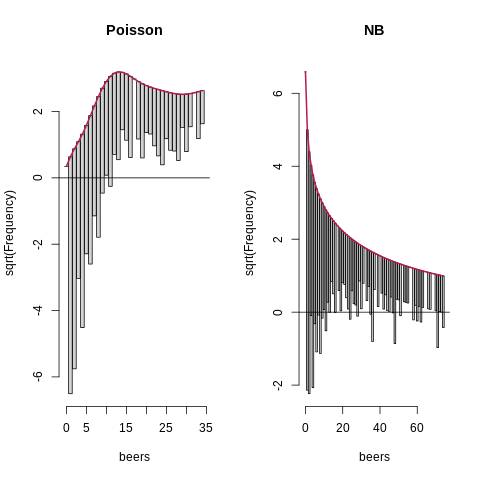

In [33]:
%%R
par(mfrow=c(1,2))
rootogram(m1, main= "Poisson")
rootogram(m3, main= "NB")

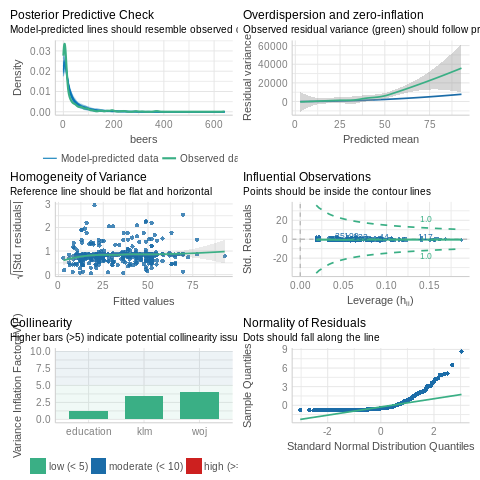

In [39]:
%%R
check_model(m3)

Diagnistics from `boot` package

For Poisson

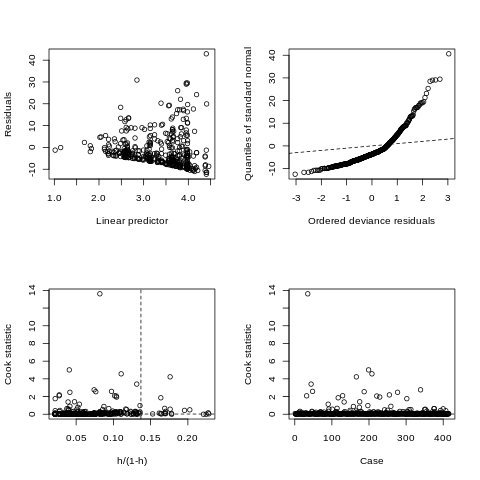

In [44]:
%%R
glm.diag.plots(m1)

For NB

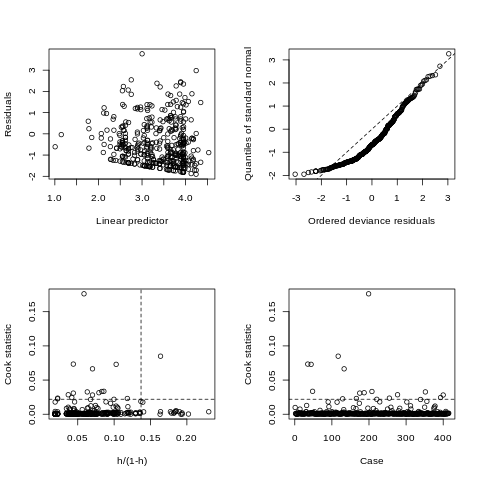

In [42]:
%%R
glm.diag.plots(m3)

Variable contribution based on `car::Anova`

```r
> Anova(m1)
Analysis of Deviance Table (Type II tests)

Response: beers
          LR Chisq Df Pr(>Chisq)
klm        1460.67  6  < 2.2e-16 ***
woj        2604.21 15  < 2.2e-16 ***
education   211.35  3  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
```

```R
> Anova(m3)
Analysis of Deviance Table (Type II tests)

Response: beers
          LR Chisq Df Pr(>Chisq)
klm         23.221  6  0.0007259 ***
woj         47.160 15  3.471e-05 ***
education    7.514  3  0.0572070 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
```

## Julia solution (TBA)